# WWZ Production

### After Detector Simulation

In [4]:
import matplotlib 
import uproot
import vector
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd

### Importing data


In [5]:
tree = uproot.open(r'C:\Users\gabri\OneDrive\Documents\University\Mphys\TriBoson\Week3\output_WWZ.root:Delphes')

Muon_events = tree.arrays(['Event.Weight', 'Muon_size', 'Muon.PT', 'Muon.Eta', 'Muon.Phi'])
nmuon_mask = Muon_events['Muon_size'] == 2
muons = vector.zip({'pt': Muon_events['Muon.PT'], 'eta': Muon_events['Muon.Eta'], 'phi': Muon_events['Muon.Phi'], 'mass': 0.10566})
dimuon = muons[nmuon_mask]

Electron_events  = tree.arrays(['Event.Weight', 'Electron_size', 'Electron.PT', 'Electron.Eta', 'Electron.Phi'])
# Create a filter to select events with exactly two electrons
nelectron_mask = Electron_events['Electron_size'] == 2
# Create the dielectron system using vector zip
electrons = vector.zip({'pt': Electron_events['Electron.PT'], 'eta': Electron_events['Electron.Eta'], 'phi': Electron_events['Electron.Phi'], 'mass': 0.000511
})
dielectron = electrons[nelectron_mask]

Muon_Electron_events = tree.arrays(['Event.Weight', 'Muon_size', 'Muon.PT', 'Muon.Eta', 'Muon.Phi', 'Electron_size', 'Electron.PT', 'Electron.Eta', 'Electron.Phi'])
electron_muon_mask =(Muon_events['Muon_size'] == 2) & (Electron_events['Electron_size'] == 2)

muons_2 = vector.zip({'pt': Muon_events['Muon.PT'], 'eta': Muon_events['Muon.Eta'], 'phi': Muon_events['Muon.Phi'], 'mass': 0.10566})
dimuons_2 = muons_2[electron_muon_mask]

electrons_2 = vector.zip({'pt': Electron_events['Electron.PT'], 'eta': Electron_events['Electron.Eta'], 'phi': Electron_events['Electron.Phi'], 'mass': 0.000511})
dielectrons_2 = electrons[electron_muon_mask]

### Invariant Mass Distributions

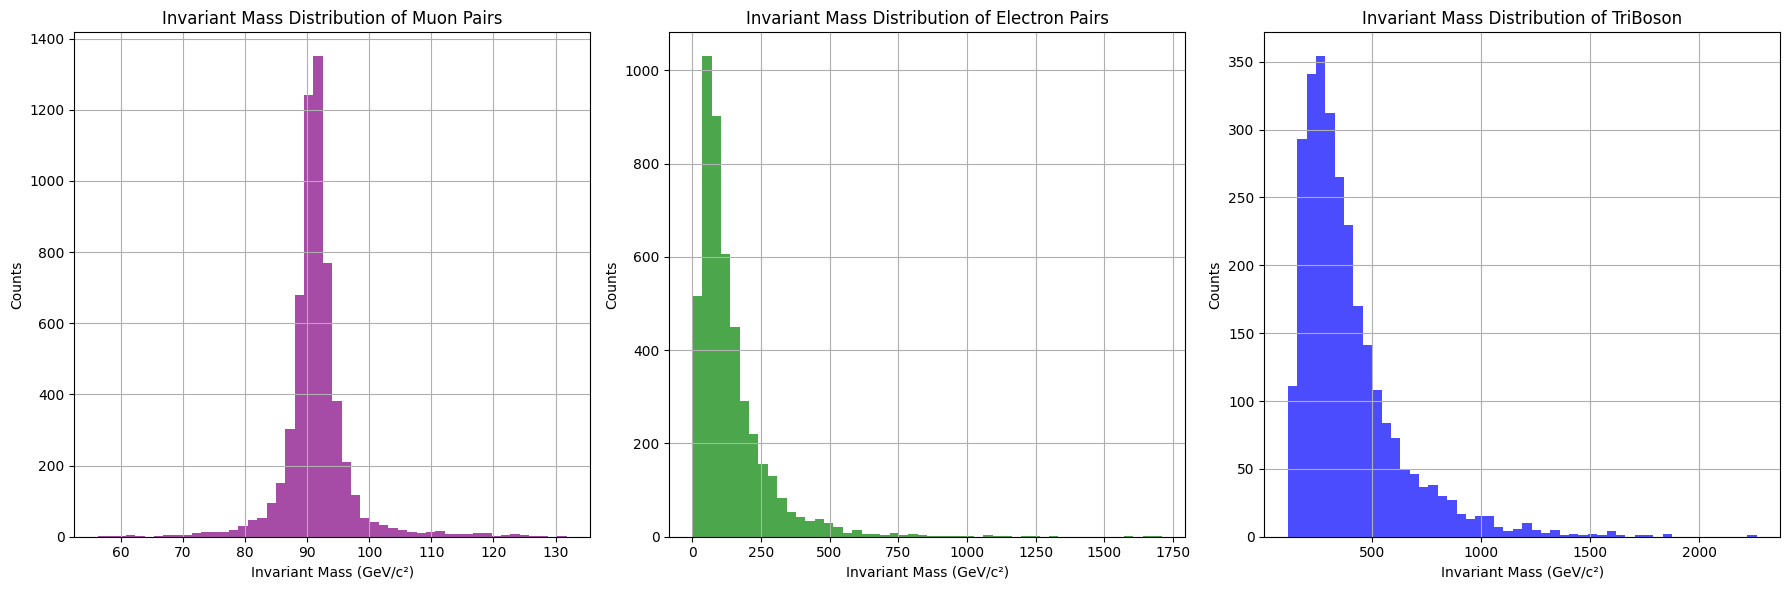

In [6]:
# Calculate the dimuon invariant mass and plot it using matplotlib
dimuon_mass = (dimuon[:, 0] + dimuon[:, 1]).mass

# Calculate the dielectron invariant mass and plot it using matplotlib
dielectron_mass = (dielectron[:, 0] + dielectron[:, 1]).mass

muon_electron_mass = (dimuons_2[:, 0] + dimuons_2[:, 1] + dielectrons_2[:, 0] + dielectrons_2[:, 1]).mass

# Plotting the histograms
plt.figure(figsize=(18, 6))

# Histogram for muon invariant masses
plt.subplot(1, 3, 1)
plt.hist(dimuon_mass, bins=50, color='purple', alpha=0.7)
plt.title('Invariant Mass Distribution of Muon Pairs')
plt.xlabel('Invariant Mass (GeV/c²)')
plt.ylabel('Counts')
plt.grid()

# Histogram for electron-neutrino invariant masses
plt.subplot(1, 3, 2)
plt.hist(dielectron_mass, bins=50, color='green', alpha=0.7)
plt.title('Invariant Mass Distribution of Electron Pairs')
plt.xlabel('Invariant Mass (GeV/c²)')
plt.ylabel('Counts')
plt.grid()

# Histogram for electron-neutrino invariant masses
plt.subplot(1, 3, 3)
plt.hist(muon_electron_mass, bins=50, color='blue', alpha=0.7)
plt.title('Invariant Mass Distribution of TriBoson')
plt.xlabel('Invariant Mass (GeV/c²)')
plt.ylabel('Counts')
plt.grid()



# Show the plots
plt.tight_layout()
plt.show()



### Muon Kinematics

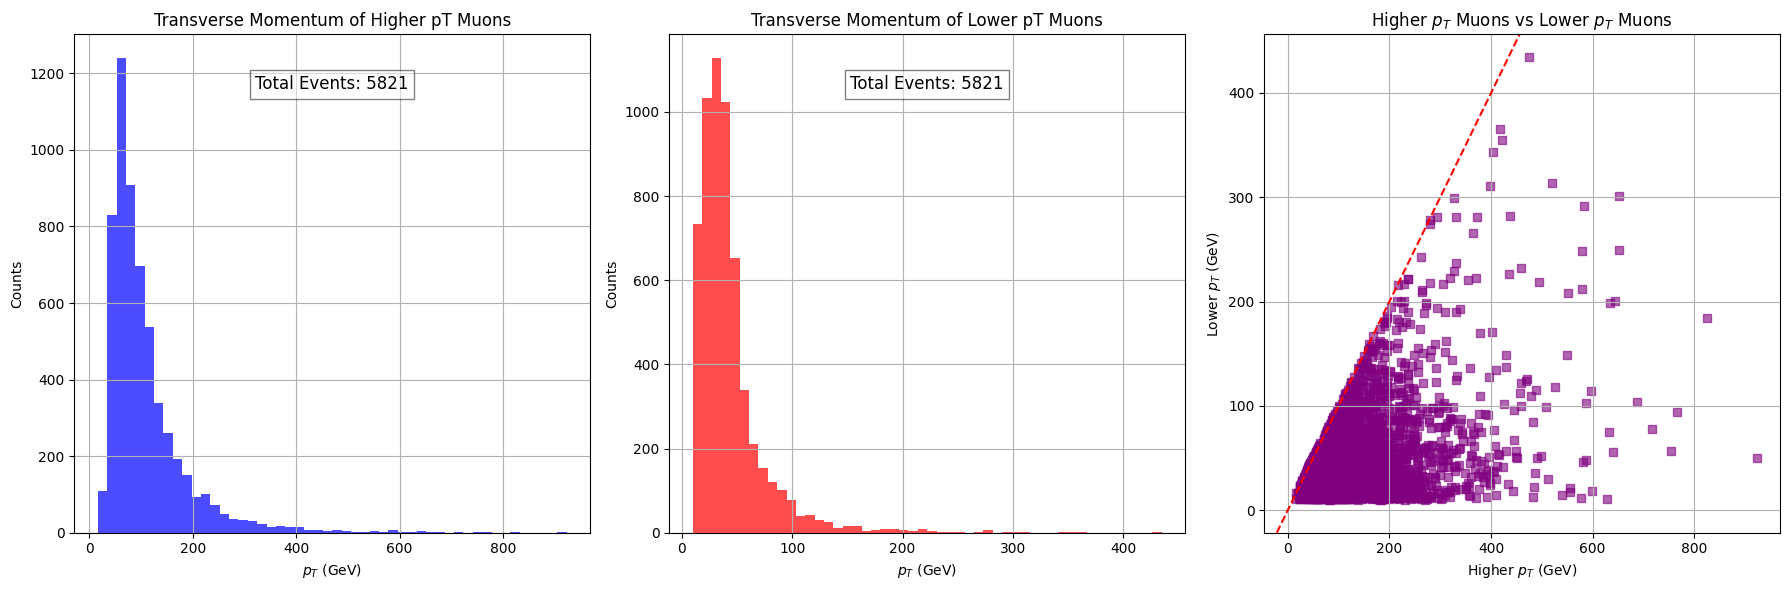

<Figure size 640x480 with 0 Axes>

In [4]:
# Extract the two muons in each event
muon1, muon2 = dimuon[:, 0], dimuon[:, 1]

# Compare the PT of the two muons and use NumPy's where to select the higher/lower PT
high_pt_muons = np.where(muon1.pt > muon2.pt, muon1, muon2)
low_pt_muons = np.where(muon1.pt > muon2.pt, muon2, muon1)

# Plotting histograms
plt.figure(figsize=(18, 6))

# Histogram for higher pT muons
plt.subplot(1, 3, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(high_pt_muons.pt, bins=50, color='blue', alpha=0.7)
plt.title('Transverse Momentum of Higher pT Muons')
plt.xlabel('$p_T$ (GeV)')
plt.ylabel('Counts')
plt.grid()

# Add text showing the total number of high pT events
total_high_pt_events = len(high_pt_muons)
plt.text(0.5, 0.9, f'Total Events: {total_high_pt_events}', ha='center', va='center', 
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Histogram for lower pT muons
plt.subplot(1, 3, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(low_pt_muons.pt, bins=50, color='red', alpha=0.7)
plt.title('Transverse Momentum of Lower pT Muons')
plt.xlabel('$p_T$ (GeV)')
plt.ylabel('Counts')
plt.grid()

# Add text showing the total number of low pT events
total_low_pt_events = len(low_pt_muons)
plt.text(0.5, 0.9, f'Total Events: {total_low_pt_events}', ha='center', va='center', 
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))


plt.subplot(1, 3, 3)  # 1 row, 2 columns, 2nd subplot
# Scatter plot for higher pT vs lower pT muons
plt.scatter(high_pt_muons.pt, low_pt_muons.pt, marker='s', color='purple', alpha=0.6)
plt.title('Higher $p_T$ Muons vs Lower $p_T$ Muons')
plt.xlabel('Higher $p_T$ (GeV)')
plt.ylabel('Lower $p_T$ (GeV)')
plt.grid()

# Show the plot
plt.axline((0, 0), slope=1, color='red', linestyle='--')  # Add a reference line (y=x)
plt.tight_layout()
plt.show()


# Show the plots
plt.tight_layout()
plt.show()


### Electron Kinematics

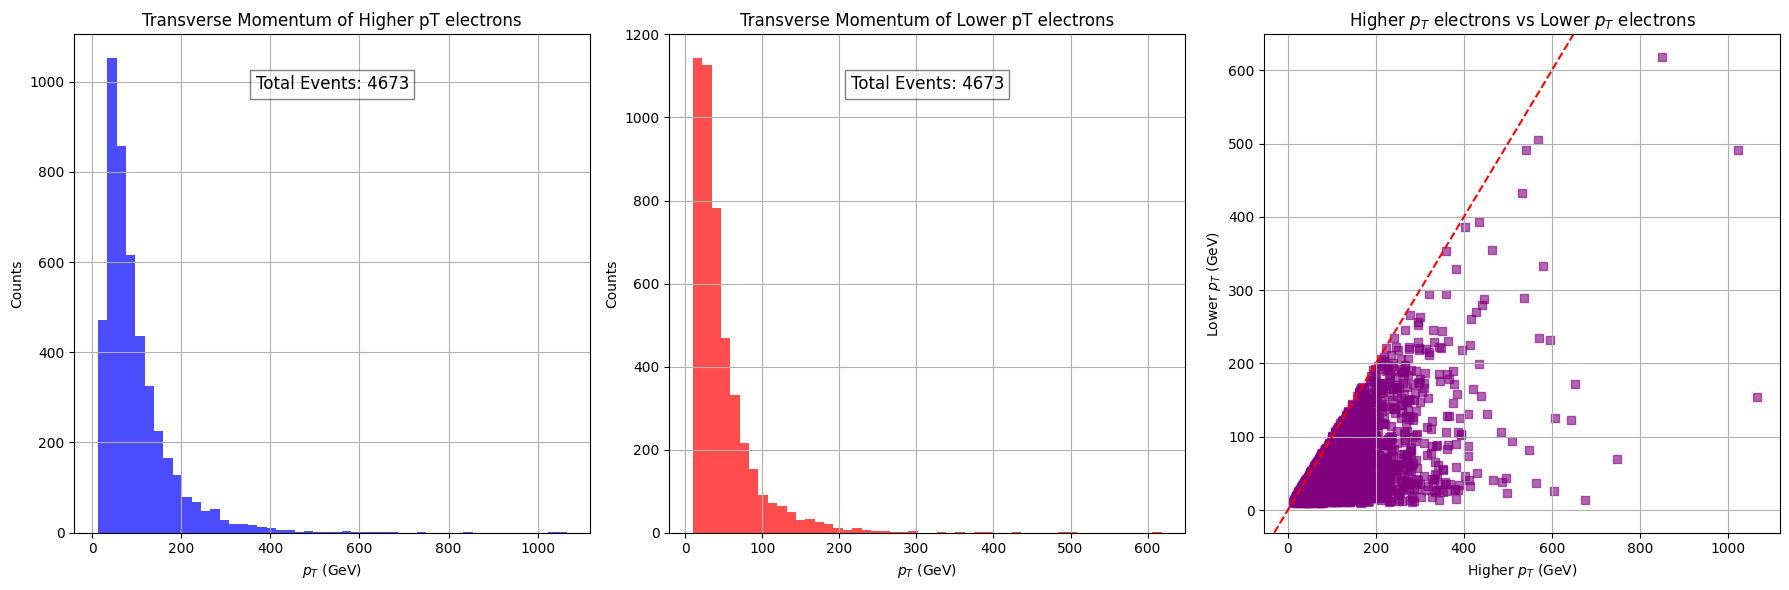

<Figure size 640x480 with 0 Axes>

In [5]:
# Extract the two electrons in each event
electron1, electron2 = dielectron[:, 0], dielectron[:, 1]

# Compare the PT of the two electrons and use NumPy's where to select the higher/lower PT
high_pt_electrons = np.where(electron1.pt > electron2.pt, electron1, electron2)
low_pt_electrons = np.where(electron1.pt > electron2.pt, electron2, electron1)

# Plotting histograms
plt.figure(figsize=(18, 6))

# Histogram for higher pT electrons
plt.subplot(1, 3, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(high_pt_electrons.pt, bins=50, color='blue', alpha=0.7)
plt.title('Transverse Momentum of Higher pT electrons')
plt.xlabel('$p_T$ (GeV)')
plt.ylabel('Counts')
plt.grid()

# Add text showing the total number of high pT events
total_high_pt_events = len(high_pt_electrons)
plt.text(0.5, 0.9, f'Total Events: {total_high_pt_events}', ha='center', va='center', 
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Histogram for lower pT electrons
plt.subplot(1, 3, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(low_pt_electrons.pt, bins=50, color='red', alpha=0.7)
plt.title('Transverse Momentum of Lower pT electrons')
plt.xlabel('$p_T$ (GeV)')
plt.ylabel('Counts')
plt.grid()

# Add text showing the total number of low pT events
total_low_pt_events = len(low_pt_electrons)
plt.text(0.5, 0.9, f'Total Events: {total_low_pt_events}', ha='center', va='center', 
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))


plt.subplot(1, 3, 3)  # 1 row, 2 columns, 2nd subplot
# Scatter plot for higher pT vs lower pT electrons
plt.scatter(high_pt_electrons.pt, low_pt_electrons.pt, marker='s', color='purple', alpha=0.6)
plt.title('Higher $p_T$ electrons vs Lower $p_T$ electrons')
plt.xlabel('Higher $p_T$ (GeV)')
plt.ylabel('Lower $p_T$ (GeV)')
plt.grid()

# Show the plot
plt.axline((0, 0), slope=1, color='red', linestyle='--')  # Add a reference line (y=x)
plt.tight_layout()
plt.show()


# Show the plots
plt.tight_layout()
plt.show()


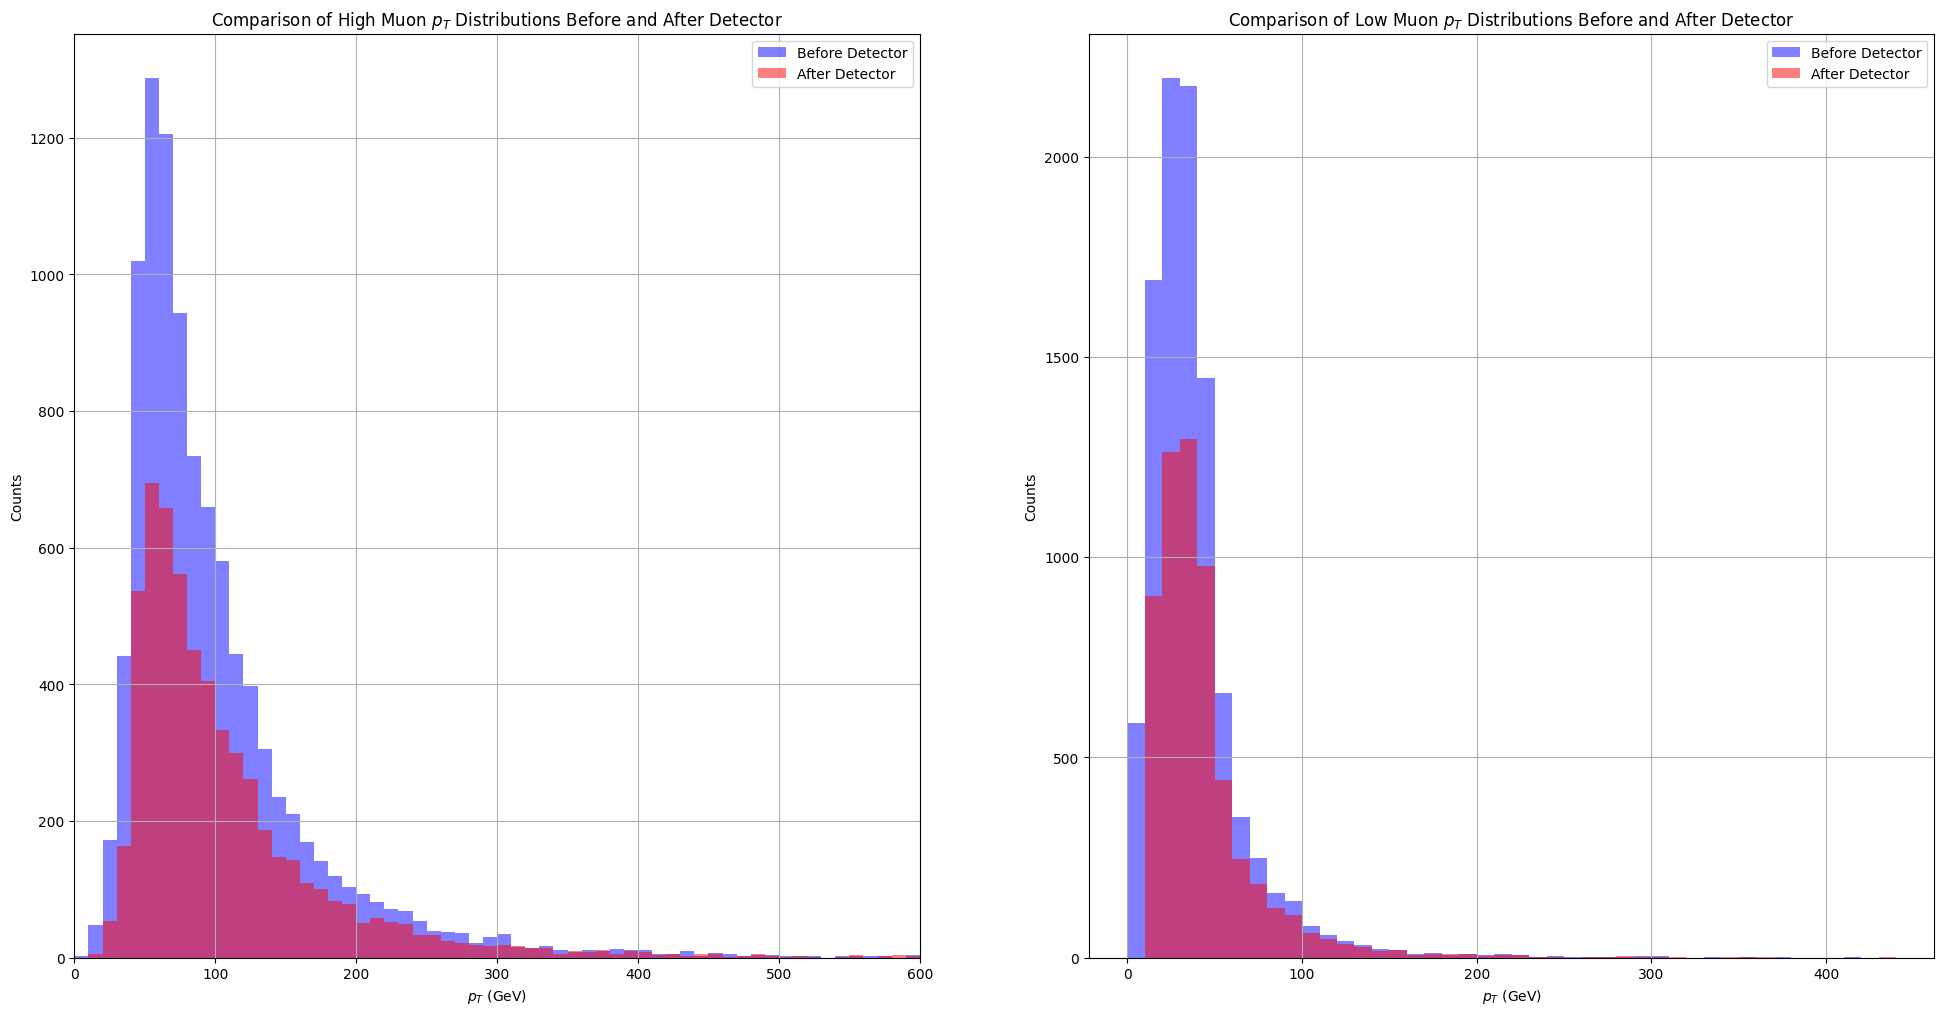

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
higher_pt_muons_before = pd.read_json('higher_pt_muons.json', lines=True)
lower_pt_muons_before = pd.read_json('lower_pt_muons.json', lines=True)

# Assuming high_pt_muons and low_pt_muons are already defined as arrays with pt attributes
higher_pt_muons_after = high_pt_muons  # Make sure high_pt_muons is defined
lower_pt_muons_after = low_pt_muons  # Corrected typo here

# Create DataFrames for after detector
higher_pt_muons_after_df = pd.DataFrame({'pT': higher_pt_muons_after.pt})
lower_pt_muons_after_df = pd.DataFrame({'pT': lower_pt_muons_after.pt})  # Fixed here

# Create figure
plt.figure(figsize=(24, 12))

# Binning for high pT muons
bins_higher = np.arange(0, max(higher_pt_muons_before['pT'].max(), higher_pt_muons_after_df['pT'].max()) + 10, 10)

# Plot for high pT muons
plt.subplot(1, 2, 1)
plt.hist(higher_pt_muons_before['pT'], bins=bins_higher, alpha=0.5, label='Before Detector', color='blue')
plt.hist(higher_pt_muons_after_df['pT'], bins=bins_higher, alpha=0.5, label='After Detector', color='red')
plt.title('Comparison of High Muon $p_T$ Distributions Before and After Detector')
plt.xlabel('$p_T$ (GeV)')
plt.ylabel('Counts')
plt.xlim(0, 600)
plt.legend()
plt.grid()

# Binning for low pT muons
bins_lower = np.arange(0, max(lower_pt_muons_before['pT'].max(), lower_pt_muons_after_df['pT'].max()) + 10, 10)

# Plot for low pT muons
plt.subplot(1, 2, 2)
plt.hist(lower_pt_muons_before['pT'], bins=bins_lower, alpha=0.5, label='Before Detector', color='blue')
plt.hist(lower_pt_muons_after_df['pT'], bins=bins_lower, alpha=0.5, label='After Detector', color='red')
plt.title('Comparison of Low Muon $p_T$ Distributions Before and After Detector')
plt.xlabel('$p_T$ (GeV)')
plt.ylabel('Counts')
plt.legend()
plt.grid()

plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Assuming you have arrays of eta and phi from your data
eta = muons['eta']  # Replace with actual pseudorapidity data
phi = muons['phi']  # Replace with actual azimuthal angle data

# Convert pseudorapidity (η) to polar angle (θ)
theta = 2 * np.arctan(np.exp(-eta))

# Convert θ and φ to degrees
theta_deg = np.degrees(theta)
phi_deg = np.degrees(phi)

# Flatten the arrays (if necessary)
theta_deg = list(itertools.chain.from_iterable(theta_deg))
phi_deg = list(itertools.chain.from_iterable(phi_deg))

# Count the number of events
num_events_theta = len(theta_deg)
num_events_phi = len(phi_deg)

# Plot histograms of the angular distributions
plt.figure(figsize=(12, 6))

# Polar angle (θ) distribution
plt.subplot(1, 2, 1)
plt.hist(theta_deg, bins=50, color='blue', alpha=0.7)
plt.title('Polar Angle (θ) Distribution')
plt.xlabel('θ (Degrees)')
plt.ylabel('Counts')
plt.grid()
plt.text(0.05, 0.95, f'Number of Events: {num_events_theta}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top')

# Azimuthal angle (φ) distribution
plt.subplot(1, 2, 2)
plt.hist(phi_deg, bins=50, color='m', alpha=0.7)
plt.title('Azimuthal Angle (φ) Distribution')
plt.xlabel('φ (Degrees)')
plt.ylabel('Counts')
plt.grid()
plt.text(0.05, 0.95, f'Number of Events: {num_events_phi}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top')

plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'numpy'